In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Applications of clustering

### Example 1: Identifying patterns 

In [4]:
data = pd.read_csv('traffic.csv',parse_dates=True,index_col='Date')
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [5]:
data_table = pd.pivot_table(data = data, values = 'Fremont Bridge Total', index = data.index.time, columns = data.index.date)
data_table

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2021-08-22,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,11.0,3.0,4.0,9.0,8.0,5.0,11.0,24.0,14.0,10.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,7.0,2.0,3.0,3.0,9.0,9.0,8.0,7.0,2.0,11.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,10.0,3.0,3.0,3.0,3.0,0.0,9.0,8.0,0.0,1.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,1.0,5.0,1.0,3.0,3.0,5.0,4.0,9.0,2.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,3.0,6.0,14.0,11.0,10.0,12.0,5.0,8.0,8.0,12.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0,31.0,25.0,12.0,14.0,...,5.0,25.0,31.0,28.0,33.0,20.0,10.0,9.0,24.0,40.0
06:00:00,155.0,142.0,105.0,27.0,17.0,137.0,153.0,149.0,43.0,87.0,...,26.0,81.0,107.0,78.0,98.0,63.0,31.0,25.0,84.0,93.0
07:00:00,352.0,319.0,319.0,33.0,26.0,327.0,368.0,340.0,304.0,183.0,...,33.0,168.0,215.0,219.0,188.0,119.0,58.0,45.0,149.0,180.0
08:00:00,437.0,418.0,370.0,105.0,69.0,457.0,462.0,435.0,404.0,268.0,...,82.0,224.0,248.0,240.0,256.0,186.0,105.0,91.0,239.0,261.0
09:00:00,276.0,241.0,212.0,114.0,103.0,278.0,275.0,255.0,189.0,145.0,...,111.0,125.0,182.0,153.0,146.0,120.0,134.0,137.0,129.0,134.0


In [6]:
# fill missing values
data_table.fillna(method='ffill',axis=1,inplace=True)

<AxesSubplot:title={'center':'hourly bicycle traffic'}, xlabel='time'>

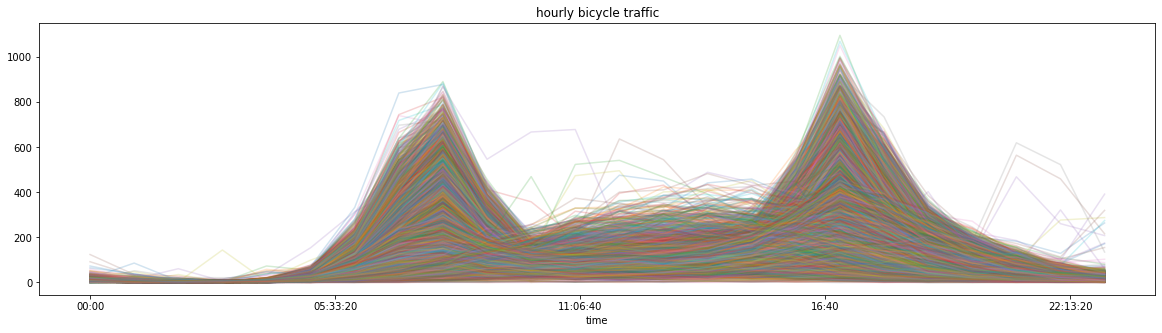

In [10]:
data_table.plot(legend=False,alpha=0.2, figsize=(20,5), title='hourly bicycle traffic')
#plt.title('hourly bicycle traffic (2012-2021)',fontsize=20)

In [12]:
days = data_table.T
from sklearn.cluster import KMeans

Text(0, 0.5, 'inertia')

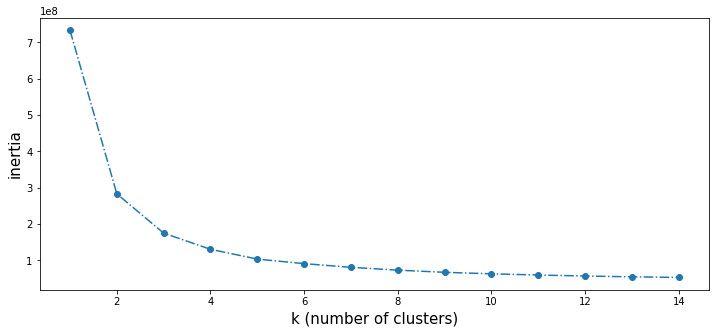

In [13]:
k_list = np.arange(1,15)
inertias = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(days)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,5))
plt.plot(k_list,inertias,'o-.')
plt.xlabel('k (number of clusters)', fontsize=15)
plt.ylabel('inertia', fontsize=15)

In [14]:
# k=2,3,4 seems a good choice

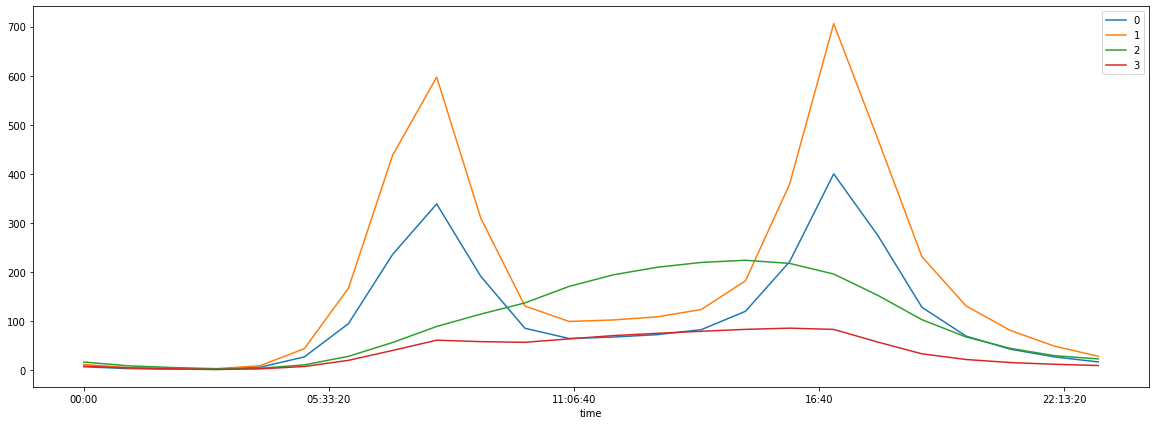

In [25]:
k = 4
cluster = KMeans(n_clusters=k)
cluster.fit(days)

centers = cluster.cluster_centers_
labels = cluster.labels_

cluster_centers = pd.DataFrame(centers.T, index=data_table.index)

# plot cluster centers
fig, ax = plt.subplots(figsize=(20,7))
for i in range(k):
    cluster_centers[i].plot(ax=ax)
plt.legend()

<AxesSubplot:xlabel='time'>

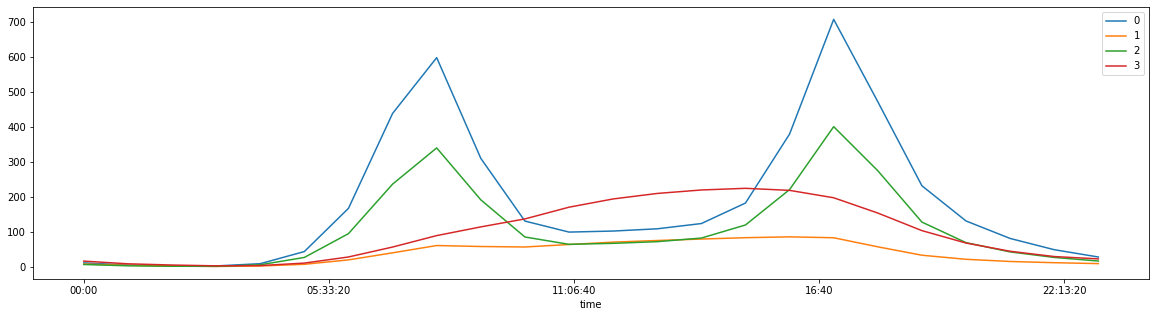

In [17]:
cluster_centers.plot(figsize=(20,5))

In [ ]:
# clusters 0,2: weekdays
# clusters 1,3: weekends and holidays

In [48]:
pd.to_datetime(days[labels==0].index).dayofweek.value_counts()

1    189
2    186
0    170
3    167
4    111
dtype: int64

In [49]:
pd.to_datetime(days[labels==1].index).dayofweek.value_counts()

5    224
6    219
4     37
0     35
2     14
3     13
1     10
dtype: int64